In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd

In [3]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect

In [5]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [6]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [7]:
# We can view all of the classes that automap found

# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [8]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [9]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Climate Analysis

In [10]:
previous = dt.date(2017, 8, 23) - dt.timedelta(days=365)
results = session.query(Measurement.date, Measurement.prcp).\
            filter(Measurement.date >= previous).all()
results_df = pd.DataFrame(results, columns=['date', 'precipitation'])
results_df.set_index('date', inplace=True)
results_df.head()

,precipitation
date,
2016-08-23,0.00
2016-08-24,0.08
2016-08-25,0.08
2016-08-26,0.00
2016-08-27,0.00


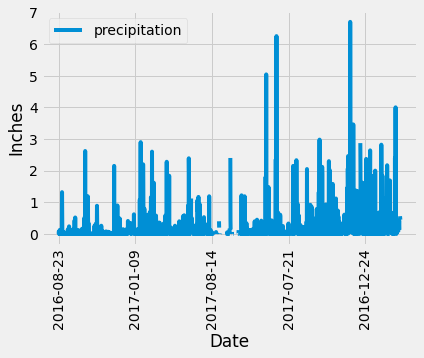

In [11]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results

# Calculate the date one year from the last date in data set.
previous = dt.date(2017, 8, 23) - dt.timedelta(days=365)
# Perform a query to retrieve the date and precipitation scores
results = session.query(Measurement.date, Measurement.prcp).\
            filter(Measurement.date >= previous).all()
# Save the query results as a Pandas DataFrame and set the index to the date column
results_df = pd.DataFrame(results, columns=['date', 'precipitation'])
results_df.set_index('date', inplace=True)
# Use Pandas Plotting with Matplotlib to plot the data
results_df.plot(rot=90)
plt.xlabel('Date')
plt.ylabel('Inches')
plt.show()

In [12]:
# Use Pandas to calcualte the summary statistics for the precipitation data

results_df.describe()

,precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


In [13]:
# Design a query to show how many stations are available in this dataset?
stations_available = session.query(func.count(Station.station)).all()
stations_available

[(9)]

In [14]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.
stations_activity = session.query(Measurement.station, func.count(Measurement.station)).\
                    group_by(Measurement.station).order_by(func.count(Measurement.station).desc()).all()
stations_activity

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [15]:
#for my use
inspector = inspect(engine)

In [16]:
#for my use
columns = inspector.get_columns('Measurement')
for column in columns:
    print(column["name"], column["type"])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [17]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature of the most active station?
Lowest_Temp = session.query(func.min(Measurement.tobs)).\
              group_by(Measurement.station).order_by(func.count(Measurement.tobs).desc()).first()

Highest_Temp = session.query(func.max(Measurement.tobs)).\
              group_by(Measurement.station).order_by(func.count(Measurement.tobs).desc()).first()

Average_Temp = session.query(func.avg(Measurement.tobs)).\
              group_by(Measurement.station).order_by(func.count(Measurement.tobs).desc()).first()

print(f"Lowest temp: {Lowest_Temp}\n\
Highest temp: {Highest_Temp} \n\
Average temp: {Average_Temp}")

Lowest temp: (54.0,)
Highest temp: (85.0,) 
Average temp: (71.66378066378067,)


In [18]:
#Latest date of 'USC00519281'
session.query(Measurement.station, Measurement.date).\
filter(Measurement.station == 'USC00519281').\
order_by(Measurement.date.desc()).first()

('USC00519281', '2017-08-18')

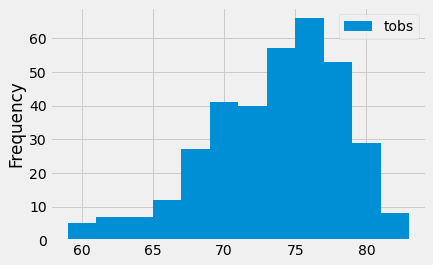

In [19]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
Previous = dt.date(2017, 8, 23) - dt.timedelta(days=365)
#previous

result = session.query(Measurement.tobs).\
        filter(Measurement.station == 'USC00519281').\
        filter(Measurement.date >= Previous).all()

#Convert into a DateFrame
df = pd.DataFrame(result, columns = ['tobs'])
#df

#create a histagram table
df.plot.hist(bins=12)
plt.show()